In [2]:
# Import Libraries

from bs4 import BeautifulSoup
import requests
import re

import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import string

# Mini Project 3 - Natural Language Processing (NLP)

## Business Proposal:

Implementing NLP methods/algorithms in the domain of ecommerce can provide numerous benefits to manufacturers and online retailers. By analyzing customer feedback and reviews using NLP, businesses can gain insights into customer needs, preferences, and concerns, which can help them improve their products, services, and overall customer experience.

## I will be mainly focusing on one product:
Product: https://www.amazon.com/Zesty-Paws-Dog-Multivitamin-Chew/dp/B07121B839/ref=cm_cr_arp_d_product_top?ie=UTF8

I chose pet supplements as I am interested if the supplements actually improve their health.
In additional some other questions I have are:

 - How long should the supplements be used before seeing results?
 - Is age the main factor for driving supplement sales?
 - How customers are sure that there is an improvement?
 

### This product says that it contains:

- Glucosamine and Chondroitin for Joint Support
- Probiotics for Gut & Immune Health
- Omega Fish Oil with Antioxidants and Vitamins for Skin & Heart Health

### Here are some of the key benefits of implementing NLP in the domain of pet supplements:

- Improved product development: NLP can help businesses identify the most popular ingredients, benefits, and concerns among pet owners, which can help them develop more effective and desirable supplement products.

- Enhanced customer satisfaction: By analyzing customer feedback in real-time, businesses can identify and address customer issues quickly, leading to improved customer satisfaction.

- More effective marketing: NLP can help businesses identify the most effective language and messaging to use in their marketing efforts, based on customer preferences and feedback.

- Increased sales: By developing more effective products and marketing campaigns, businesses can increase sales and profitability in the highly competitive pet supplement market.

In summary, implementing NLP methods/ algorithms in the domain of pet supplements can provide numerous benefits to businesses, including improved product development, enhanced customer satisfaction, more effective marketing, and increased sales.

# Webscraping

In [40]:
# webpage to scrape from
# because most of the review are positive, I think it's best to sort through all the negative reviews first to get a more balanced dataset.
url = 'https://www.amazon.com/Zesty-Paws-Dog-Multivitamin-Chew/product-reviews/B07121B839/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar='

In [41]:
# Testing request
# URL setup and HTML request
headers = {'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'}

r = requests.get(f'{url}one_star&pageNumber=1', headers=headers)
content = r.content

# Parsing the HTML content
soup = BeautifulSoup(content)

# Getting reviews from soup
reviews = soup.find_all('div', class_='review')

In [42]:
# name of product
product = soup.title.text.replace('Amazon.ca:Customer reviews: ', '').strip()
product

'Amazon.com: Customer reviews: Multifunctional Supplements for Dogs - Glucosamine and Chondroitin for Joint Support with Probiotics for Gut &amp; Immune Health – Omega Fish Oil with Antioxidants and Vitamins for Skin &amp; Heart Health'

In [43]:
# Initialize data list
data = []

# For every item in review, scrape the following and store as a list called data
for item in reviews:
    review = {
    'name': item.find('span', class_='a-profile-name').text.strip(),
    'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in the', '').strip(),
    'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
    'rating': float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
    'text': item.find('span', {'data-hook': 'review-body'}).text.strip(),
    }
    data.append(review)  

In [44]:
# Save results to a dataframe
df = pd.DataFrame(data)
df.head()

,name,date,title,rating,text
0,Blayne,"United States on February 17, 2023",Please avoid!!,1.0,You try to do right by your dog by getting the...
1,Jake Morrison,"United States on February 17, 2023",Dog was allergic to these!,1.0,I have an 80lb weimaraner and started him off ...
2,le’MamaAmazon Customer,"United States on February 1, 2021",These made my dog sick....,1.0,Poor little guy! Apparently I have one of thos...
3,Captain,"United States on March 4, 2023","12 yo Italian Grey hound, very sick",1.0,I have two dogs and my boxer mix doesn’t seem ...
4,Dio I,"United States on May 28, 2022",Not for every dog,1.0,I wanted to take my time before I write this n...


In [45]:
# create function to get soup for every page of the reviews

def get_soup(url):
    headers = {'User-Agent':
                'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                AppleWebKit/537.36 (KHTML, like Gecko) \
                Chrome/90.0}.4430.212 Safari/537.36',
                'Accept-Language': 'en-US, en;q=0.5'}
    r = requests.get(url, headers=headers)
    content = r.content
    soup = BeautifulSoup(content)
    return soup

In [51]:
# Initialize list to store reviews
reviewlist = []

# Define another function to look for reviews in soup, then append reviews to reviewlist
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    # if there is item in reviews append data to list or pass
    try:
        for item in reviews:
            review = {
                'name': item.find('span', class_='a-profile-name').text.strip(),
                'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in the', '').strip(),
                'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                'rating': float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                'text': item.find('span', {'data-hook': 'review-body'}).text.strip()
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
for x in range(1, 85):
    # loop through all one star reviews
    # it says there are 843 reviews so set to 85
    soup = get_soup(f'{url}two_star&pageNumber={x}')
    get_reviews(soup)
    
print(f'Getting page: {x}')
print(len(reviewlist))

Getting page: 9
60


In [ ]:
for x in range(1, 20):
    # loop through all two star reviews
    # 195 with reviews: set to 20
    soup = get_soup(f'{url}two_star&pageNumber={x}')
    get_reviews(soup)
    
print(f'Getting page: {x}')
print(len(reviewlist))

Getting page: 9
60


In [11]:
for x in range(1, 400):
    # fill rest of reviews with 5 star reviews
    # max append = 5000 reviews so set at 400
    soup = get_soup(f'{url}five_star&pageNumber={x}')
    get_reviews(soup)
    
print(f'Getting page: {x}')
print(len(reviewlist))

Getting page: 299
1910


# EDA

In [53]:
# Save results to a dataframe
df = pd.DataFrame(reviewlist)

# just incase of duplicates
df = df.drop_duplicates(subset='review')
df.head()

,name,date,title,rating,review,country,sentiment
0,Blayne,2023-02-17,Please avoid!!,1.0,You try to do right by your dog by getting the...,United States,negative
1,Jake Morrison,2023-02-17,Dog was allergic to these!,1.0,I have an 80lb weimaraner and started him off ...,United States,negative
2,le’MamaAmazon Customer,2021-02-01,These made my dog sick....,1.0,Poor little guy! Apparently I have one of thos...,United States,negative
3,Captain,2023-03-04,"12 yo Italian Grey hound, very sick",1.0,I have two dogs and my boxer mix doesn’t seem ...,United States,negative
4,Dio I,2022-05-28,Not for every dog,1.0,I wanted to take my time before I write this n...,United States,negative


In [ ]:
# If webscraping is not working properly, previous scraped dataset
#df = pd.read_csv('Supplements_for_Dogs.csv')
#df = df.drop_duplicates(subset='review')
#df.head()

,name,date,title,rating,review,country,sentiment
0,Blayne,2023-02-17,Please avoid!!,1.0,You try to do right by your dog by getting the...,United States,negative
1,Jake Morrison,2023-02-17,Dog was allergic to these!,1.0,I have an 80lb weimaraner and started him off ...,United States,negative
2,le’MamaAmazon Customer,2021-02-01,These made my dog sick....,1.0,Poor little guy! Apparently I have one of thos...,United States,negative
3,Captain,2023-03-04,"12 yo Italian Grey hound, very sick",1.0,I have two dogs and my boxer mix doesn’t seem ...,United States,negative
4,Dio I,2022-05-28,Not for every dog,1.0,I wanted to take my time before I write this n...,United States,negative


In [5]:
# check rows of dataset
df.shape

(3987, 7)

In [6]:
# split the review date columns into the date and the country
df[['country', 'date']] = df['date'].str.split('on', 1, expand=True)
df.head()

ValueError: Columns must be same length as key

In [7]:
# check if there are reviews from other countries
df['country'].unique()

array(['United States '], dtype=object)

In [8]:
# delete 'us' all the country values are the same
df = df.replace({'country': 'United States 🇺🇸 '}, {'country': 'United States '})
df['country'].unique()

array(['United States '], dtype=object)

In [9]:
# check dtypes of columns
df.dtypes

name          object
date          object
title         object
rating       float64
review        object
country       object
sentiment     object
dtype: object

In [10]:
# change date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.dtypes

name                 object
date         datetime64[ns]
title                object
rating              float64
review               object
country              object
sentiment            object
dtype: object

In [11]:
# 1-2 can have a negative sentiment and 5 to positive
df['sentiment'] = pd.cut(df['rating'], 
                                bins=[0, 2, 5], 
                                labels=['negative', 'positive'])

In [12]:
# check df
df.head()

,name,date,title,rating,review,country,sentiment
0,Blayne,2023-02-17,Please avoid!!,1.0,You try to do right by your dog by getting the...,United States,negative
1,Jake Morrison,2023-02-17,Dog was allergic to these!,1.0,I have an 80lb weimaraner and started him off ...,United States,negative
2,le’MamaAmazon Customer,2021-02-01,These made my dog sick....,1.0,Poor little guy! Apparently I have one of thos...,United States,negative
3,Captain,2023-03-04,"12 yo Italian Grey hound, very sick",1.0,I have two dogs and my boxer mix doesn’t seem ...,United States,negative
4,Dio I,2022-05-28,Not for every dog,1.0,I wanted to take my time before I write this n...,United States,negative


In [23]:
# export dataframe as CSV
#df.to_csv(r'Dog_Supplement_Raw.csv', index=False)

In [13]:
# checking to see if the number of words matter for sentiment
count_df = pd.DataFrame(df['sentiment'])
count_df

,sentiment
0,negative
1,negative
2,negative
3,negative
4,negative
...,...
4012,positive
4013,positive
4014,positive
4015,positive


In [14]:
# create char count for review column
count_df['char_count'] = len(df['review']) + df['title'].apply(len)

# create word count
count_df['word_count'] = df['review'].apply(lambda x: len(str(x).split())) + df['title'].apply(lambda x: len(str(x).split()))

# create word density
count_df['word_density'] = count_df['char_count'] / (count_df['word_count'] + 1)

# create punctuation count
count_df['punctuation_count'] = df['review'].apply(lambda x: len([char for char in str(x) if char in string.punctuation])) + df['title'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))

# create uppercase word count
count_df['uppercase_word_count'] = df['review'].apply(lambda x: len([word for word in str(x).split() if word.isupper()])) + df['title'].apply(lambda x: len([word for word in str(x).split() if word.isupper()]))

# view the updated dataframe
count_df.head()

,sentiment,char_count,word_count,word_density,punctuation_count,uppercase_word_count
0,negative,4001,180,22.104972,25,6
1,negative,4013,186,21.459893,29,2
2,negative,4013,412,9.716707,77,6
3,negative,4022,122,32.699187,6,6
4,negative,4004,278,14.351254,41,15


In [15]:
# describe the word/character features
count_df.describe()

,char_count,word_count,word_density,punctuation_count,uppercase_word_count
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,4012.268121,55.541510,130.043734,7.156258,1.928016
std,15.457583,57.923172,128.745124,10.308776,4.432024
min,3988.000000,2.000000,1.926386,0.000000,0.000000
25%,4002.000000,25.000000,55.068493,3.000000,0.000000
50%,4008.000000,46.000000,85.595745,5.000000,1.000000
75%,4019.000000,72.000000,154.346154,9.000000,2.000000
max,4177.000000,2091.000000,1331.666667,456.000000,155.000000


In [16]:
# change sentiment to binary
count_df = pd.get_dummies(count_df, columns=['sentiment'], drop_first=True)
count_df.head()

,char_count,word_count,word_density,punctuation_count,uppercase_word_count,sentiment_positive
0,4001,180,22.104972,25,6,0
1,4013,186,21.459893,29,2,0
2,4013,412,9.716707,77,6,0
3,4022,122,32.699187,6,6,0
4,4004,278,14.351254,41,15,0


In [17]:
# export dataframe as CSV
#count_df.to_csv(r'dog_supplement_review_count.csv', index=False)

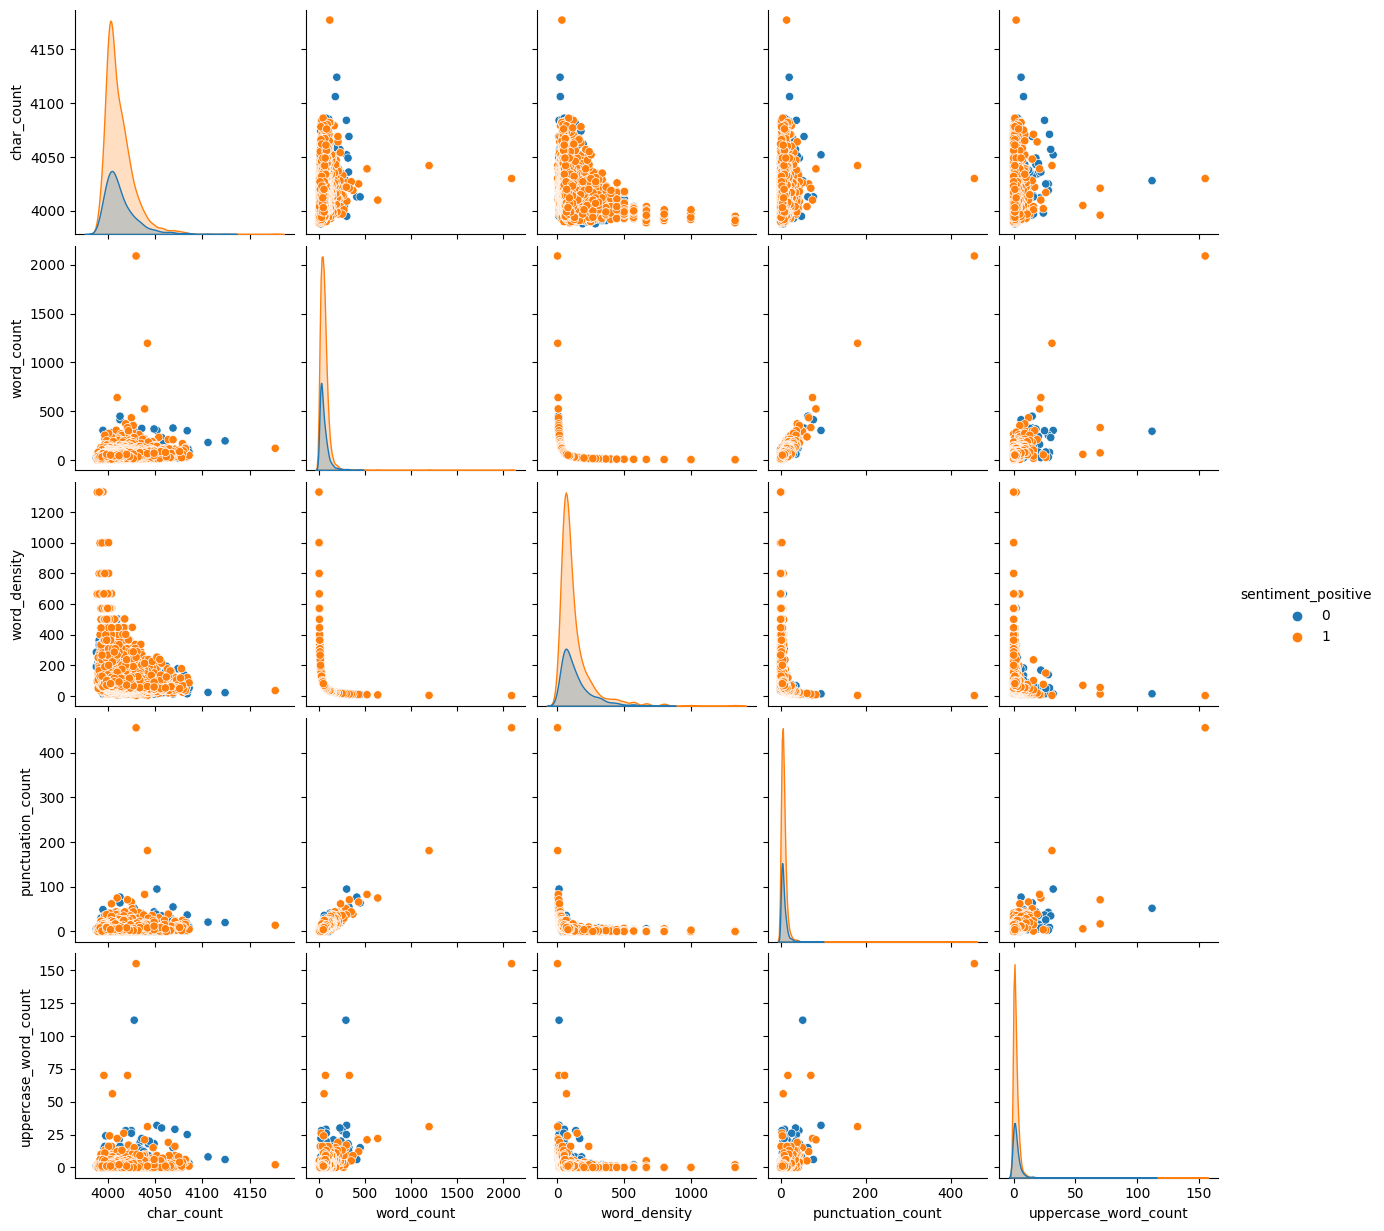

In [18]:
# using seaborn pair plot to see if there's correlation with the sentiment
pair_plot = sns.pairplot(count_df, hue = 'sentiment_positive')

# save the pair plot as a PNG file
#pair_plot.savefig("pair_plot.png")

# positive reviews tend to have more written about it than negative reviews

In [81]:
# only want alphanumeric characters for reviews (Saw some emoticons used in the reviews)
# define regular expression pattern for non-alphanumeric characters
pattern = re.compile(r'[^a-zA-Z0-9\s]')

# define function to clean text
def clean_text(text):
    text = pattern.sub('', text)  # remove non-alphanumeric characters
    text = text.lower()  #convert to lowercase
    return text

# apply cleaning function to review column
df['review'] = df['review'].astype(str)
df['review'] = df['review'].apply(clean_text)

In [78]:
# apply cleaning function to title column
df['title'] = df['title'].apply(clean_text)

In [82]:
# check if implemented
df.head()

,name,date,title,rating,review,country,sentiment
0,Blayne,2023-02-17,please avoid,1.0,you try to do right by your dog by getting the...,United States,negative
1,Jake Morrison,2023-02-17,dog was allergic to these,1.0,i have an 80lb weimaraner and started him off ...,United States,negative
2,le’MamaAmazon Customer,2021-02-01,these made my dog sick,1.0,poor little guy apparently i have one of those...,United States,negative
3,Captain,2023-03-04,12 yo italian grey hound very sick,1.0,i have two dogs and my boxer mix doesnt seem t...,United States,negative
4,Dio I,2022-05-28,not for every dog,1.0,i wanted to take my time before i write this n...,United States,negative


In [83]:
# export dataframe as CSV
#df.to_csv(r'dog_supplement_clean.csv', index=False)

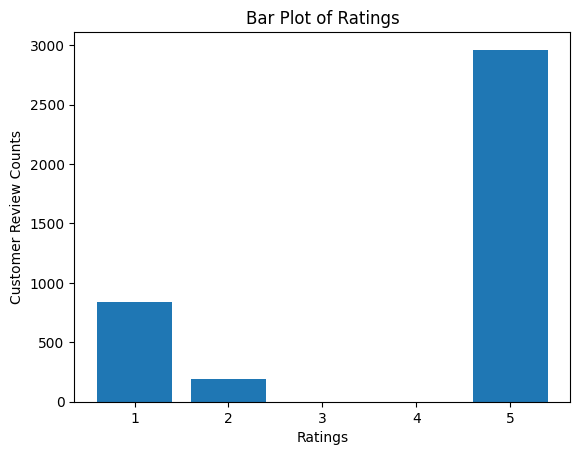

In [84]:
# create bar plot for ratings too see the counts
plt.bar(df['rating'].unique(), df['rating'].value_counts().sort_index())

# add title and axis labels
plt.title('Bar Plot of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Customer Review Counts')

# show the plot
plt.show()

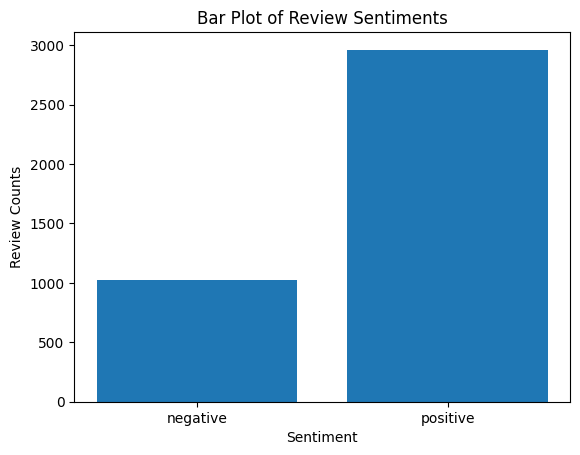

In [85]:
# create bar plot for ratings too see the counts
plt.bar(df['sentiment'].unique(), df['sentiment'].value_counts().sort_index())

# add title and axis labels
plt.title('Bar Plot of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Review Counts')

# show the plot
plt.show()

In [86]:
# check shape of raw_df
df.shape

(3987, 7)

In [87]:
# check for missing values
df.isna().sum()

name         0
date         0
title        0
rating       0
review       0
country      0
sentiment    0
dtype: int64